In [1]:
# Make you have Scikit-Learn 1.1.1
import sklearn
assert sklearn.__version__ >= '1.1'

In [2]:
from ipywidgets import FloatProgress
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image 
import cv2 as cv
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Loading and cleaning data

In [3]:
boards_df = pd.read_csv('./raw_data/boards_df.csv',index_col=0)
boards_df

,Title,Company,Image_hyperlink,Artist,Year,Image_path
0,Skate Mental / AlienVs Predator Night,Skate Mental,https://www.deckslog.com/wp-content/uploads/20...,NaN,NaN,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
1,Skate / Mental Vs Predator Day 8.28,Skate,https://www.deckslog.com/wp-content/uploads/20...,NaN,NaN,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
2,Alien Workshop / Debut Decks Blue,Alien Workshop,https://www.deckslog.com/wp-content/uploads/20...,NaN,NaN,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
3,Antihero / Classic Eagle Orange,Antihero,https://www.deckslog.com/wp-content/uploads/20...,NaN,NaN,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
4,Antihero / Classic Eagle Larger,Antihero,https://www.deckslog.com/wp-content/uploads/20...,NaN,NaN,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
...,...,...,...,...,...,...
2329,Death / Og Skull Black,Death,https://www.deckslog.com/wp-content/uploads/20...,NaN,NaN,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
2330,Death / Og Skull White,Death,https://www.deckslog.com/wp-content/uploads/20...,NaN,NaN,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
2331,Antihero / Shaped Eagle Green Giant,Antihero,https://www.deckslog.com/wp-content/uploads/20...,NaN,NaN,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
2332,Antihero / Shaped Eagle Blue Meanie,Antihero,https://www.deckslog.com/wp-content/uploads/20...,NaN,NaN,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...


<AxesSubplot: xlabel='Company'>

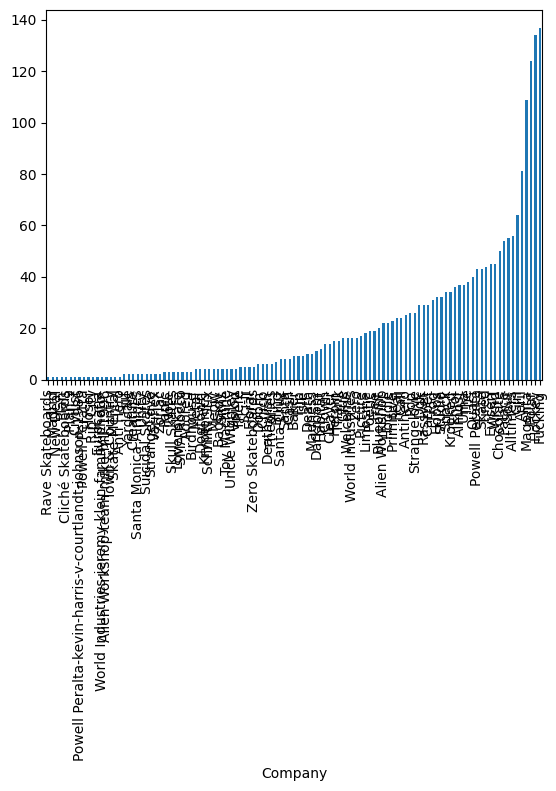

In [4]:
boards_df.groupby("Company").count().sort_values(by=["Title"])["Title"].plot(kind="bar")

On va seulement s'intéresser aux marques représentées par plus de 60 decks

In [5]:
(boards_df.groupby("Company").count()>=60)[['Title']]

,Title
Company,
Adored,False
Alien Workshop,False
Alien Workshop-team-mike-hill-1996,False
Alltimers,False
Almost,False
...,...
World Industries-jeremy-klein-family-photo-,False
Yardsale,False
Zero,False


In [6]:
boards_df.groupby("Company").count()['Title'][(boards_df.groupby("Company").count()>=60)['Title']]

Company
April       81
Fucking    137
Girl        64
Hockey     134
Magenta    109
Polar      124
Name: Title, dtype: int64

In [7]:
boards_df.query('Company in ["April","Fucking","Girl","Hockey","Magenta","Polar"]')

,Title,Company,Image_hyperlink,Artist,Year,Image_path
205,Girl / Guy Mariano,Girl,https://www.deckslog.com/wp-content/uploads/20...,Pawel Swanski,2013.0,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
222,Girl / Tyler Pacheco Birdman,Girl,https://www.deckslog.com/wp-content/uploads/20...,NaN,NaN,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
223,Girl / Rick Howard Best Of Both Loveseat,Girl,https://www.deckslog.com/wp-content/uploads/20...,NaN,NaN,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
224,Girl / Rick Mccrank Bar Blues,Girl,https://www.deckslog.com/wp-content/uploads/20...,NaN,NaN,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
225,Girl / Niels Bennett Bar Blues,Girl,https://www.deckslog.com/wp-content/uploads/20...,NaN,NaN,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
...,...,...,...,...,...,...
2257,Fucking / Awesome Sean Pablo Angel Burn Black,Fucking,https://www.deckslog.com/wp-content/uploads/20...,NaN,NaN,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
2258,Fucking / Awesome Tiger Holographic Yellow,Fucking,https://www.deckslog.com/wp-content/uploads/20...,NaN,NaN,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
2297,Hockey / Donovon Piscopo Dawn,Hockey,https://www.deckslog.com/wp-content/uploads/20...,NaN,NaN,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
2314,Polar / No Comply Red,Polar,https://www.deckslog.com/wp-content/uploads/20...,NaN,NaN,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...


In [8]:
Company_recognition_df = boards_df.query('Company in ["April","Fucking","Girl","Hockey","Magenta","Polar"]')[['Company','Image_path']].reset_index(drop=True)
Company_recognition_df.head()

,Company,Image_path
0,Girl,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
1,Girl,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
2,Girl,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
3,Girl,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
4,Girl,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...


We need to shuffle the dataset

In [9]:
Company_recognition_df = Company_recognition_df.sample(frac=1).reset_index(drop=True)
Company_recognition_df.head()

,Company,Image_path
0,April,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
1,Hockey,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
2,Fucking,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
3,April,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
4,Girl,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...


In [10]:
Company_recognition_df.describe()

,Company,Image_path
count,649,649
unique,6,649
top,Fucking,/Users/etiennelanzeray/code/EtiNL/Sk8_decks_pr...
freq,137,1


In [11]:
Company_recognition_df.shape

(649, 2)

Comme on peut le voir chaque board de notre dataset possède une image

uint8
(1000, 1000, 3)


([], [])

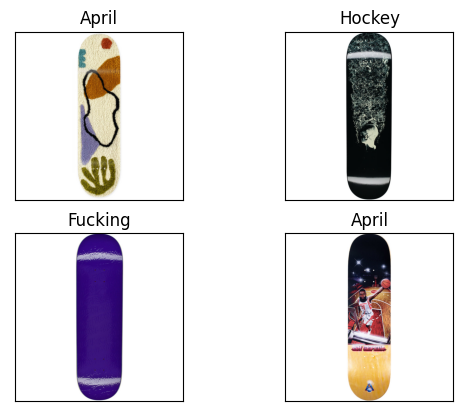

In [12]:
# load image as pixel array
image_0, image_1, image_2, image_3 = image.imread(Company_recognition_df['Image_path'][0]),image.imread(Company_recognition_df['Image_path'][1]),image.imread(Company_recognition_df['Image_path'][2]),image.imread(Company_recognition_df['Image_path'][3])
# summarize shape of the pixel array
print(image_0.dtype)
print(image_0.shape)
# display the array of pixels as an image
plt.subplot(2,2,1)
plt.imshow(image_0)
plt.title(Company_recognition_df['Company'][0])
plt.xticks(())
plt.yticks(())

plt.subplot(2,2,2)
plt.imshow(image_1)
plt.title(Company_recognition_df['Company'][1])
plt.xticks(())
plt.yticks(())

plt.subplot(2,2,3)
plt.imshow(image_2)
plt.title(Company_recognition_df['Company'][2])
plt.xticks(())
plt.yticks(())

plt.subplot(2,2,4)
plt.imshow(image_3)
plt.title(Company_recognition_df['Company'][3])
plt.xticks(())
plt.yticks(())

Le PCA fonctionne en niveau de gris donc nous allons convertir les images en gris

uint8
(1000, 1000)


([], [])

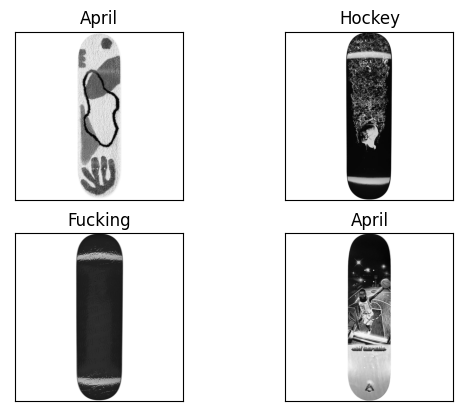

In [13]:
image_0, image_1, image_2, image_3 = cv.imread(Company_recognition_df['Image_path'][0],0),cv.imread(Company_recognition_df['Image_path'][1],0),cv.imread(Company_recognition_df['Image_path'][2],0),cv.imread(Company_recognition_df['Image_path'][3],0)
# summarize shape of the pixel array
print(image_0.dtype)
print(image_0.shape)
# display the array of pixels as an image
plt.subplot(2,2,1)
plt.imshow(image_0,cmap='gray')
plt.title(Company_recognition_df['Company'][0])
plt.xticks(())
plt.yticks(())

plt.subplot(2,2,2)
plt.imshow(image_1,cmap='gray')
plt.title(Company_recognition_df['Company'][1])
plt.xticks(())
plt.yticks(())

plt.subplot(2,2,3)
plt.imshow(image_2,cmap='gray')
plt.title(Company_recognition_df['Company'][2])
plt.xticks(())
plt.yticks(())

plt.subplot(2,2,4)
plt.imshow(image_3,cmap='gray')
plt.title(Company_recognition_df['Company'][3])
plt.xticks(())
plt.yticks(())

In [14]:
X_list = []
pourcentage = 0
list_outliers = []

for i,image_path in enumerate(Company_recognition_df['Image_path']):
    img = cv.imread(image_path,0)
    #resizing the image from 1000*1000 to 100*100 for computation time opt
    height, width = img.shape[:2]
    img_resized = cv.resize(img,(int(width/10), int(height/10)), interpolation = cv.INTER_AREA)
    img_flattened = np.reshape(img_resized,img_resized.shape[0]*img_resized.shape[1])
    if img_resized.shape[0]*img_resized.shape[1]!=10000:
        print(img_resized.shape[0]*img_resized.shape[1])
        print(i,image_path)
        list_outliers.append(i)
    X_list.append(list(img_flattened))
    if pourcentage < int((i+1)/649*100):
        pourcentage = int((i+1)/649*100)
        print(f'{pourcentage}%')

1%
2%
3%
4%
15876
29 /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeTyshawnJonesSnickersDeckblue_a39bae1b-bcee-4420-bd57-5a7d3ca1a499.jpg
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
7200
237 /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/grl-guy-mariano-pawel-swanski-2013.jpg
37%
38%
39%
40%
15625
260 /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeLandscapesDeckFuckingAwesomeLandscapesDeck.jpg
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
15625
622 /Users/etiennelanzeray/code/EtiNL/Sk8_decks_project/raw_data/FuckingAwesomeLandscapesDeckFuckingAwesomeLandscapesDeck_8b136a81-2021-4e47-845d-b40e091aef53.jpg
96%
97%
98%
99%
100%


As we can see bellow, there are outliers in images shapes:

In [15]:
for i in list_outliers:
    print(len(X_list[i]))

15876
7200
15625
15625


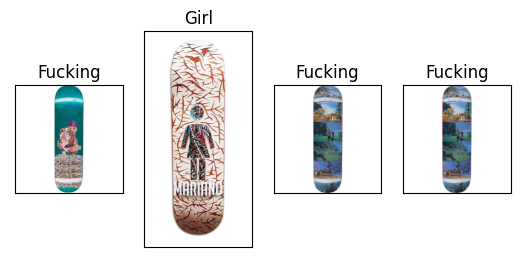

In [16]:
for ind,i in enumerate(list_outliers):
    plt.subplot(1,4,ind+1)
    plt.imshow(image.imread(Company_recognition_df['Image_path'][i]))
    plt.title(Company_recognition_df['Company'][i])
    plt.xticks(())
    plt.yticks(())

We are going to remove them from the dataset `Company_recognition_df ` and `X_list`

In [17]:
Company_recognition_df = Company_recognition_df.drop(labels=list_outliers,axis=0)
Company_recognition_df = Company_recognition_df.reset_index(drop=True)

In [18]:
def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)

In [19]:
delete_multiple_element(X_list,list_outliers)

Now that we removed the boards with problematic image sizes, we can create our `X` Dataframe

In [22]:
X = pd.DataFrame(X_list)
X

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
641,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
642,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
643,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


# Compression with PCA

In [42]:
pca = PCA(n_components=50)
pca.fit(X)

PCA(n_components=50)

In [43]:
data_projected= pca.transform(X)

In [44]:
pca.components_.shape

(50, 10000)

The first component is a vector of $10000$ values.
We now have 150 components of $10000$ values each.

One board is described as a linear combination of those components.

Let's reconstruct one image from its reduced representation to see how it works.

❓ Use `inverse_transform` on your `data_projected` to reconstruct your compressed images
👉 Store the result in `data_reconstructed``



In [45]:
data_reconstructed= pca.inverse_transform(data_projected)

In [46]:
data_reconstructed=data_reconstructed.reshape((645,100,100))
data_reconstructed.shape

(645, 100, 100)

([], [])

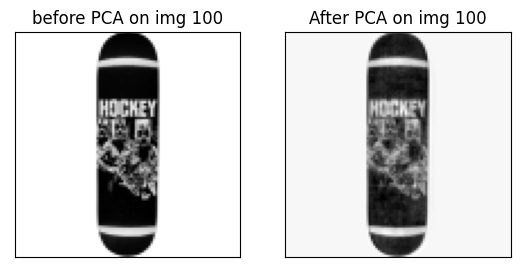

In [47]:
img_num = 100


plt.subplot(1, 2, 1)
plt.title(f'before PCA on img {img_num}')
img = cv.imread(Company_recognition_df['Image_path'][img_num],0)
height, width = img.shape[:2]
img_resized = cv.resize(img,(int(width/10), int(height/10)), interpolation = cv.INTER_AREA)
plt.imshow(img_resized, cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

plt.subplot(1, 2, 2)
plt.title(f'After PCA on img {img_num}')
plt.imshow(data_reconstructed[img_num], cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

# Investigate your Principal Components

Lets plot an image that corresponds to the "mean" board of the whole dataset

([], [])

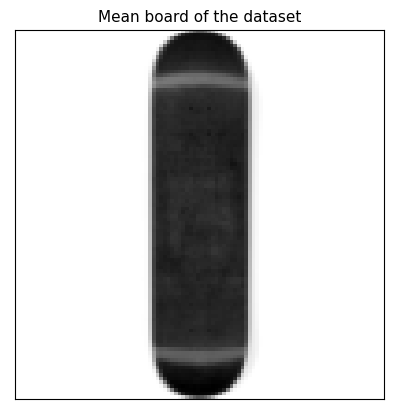

In [48]:
plt.title('Mean board of the dataset', size=11)
plt.imshow(pca.mean_.reshape(100,100), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

Plot of the 5 first principal components

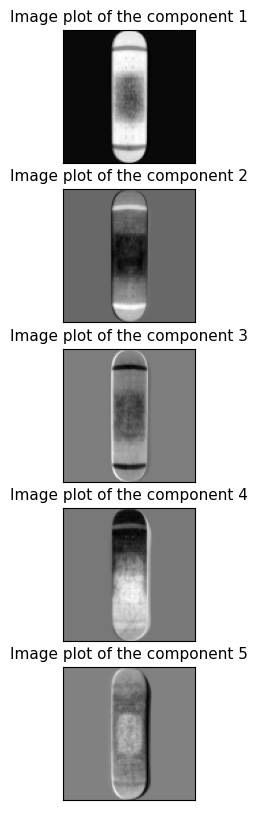

In [49]:
fig = plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5, 1, i+1)
    plt.title(f'Image plot of the component {i+1}', size=11)
    plt.imshow(pca.components_[i].reshape(100,100), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

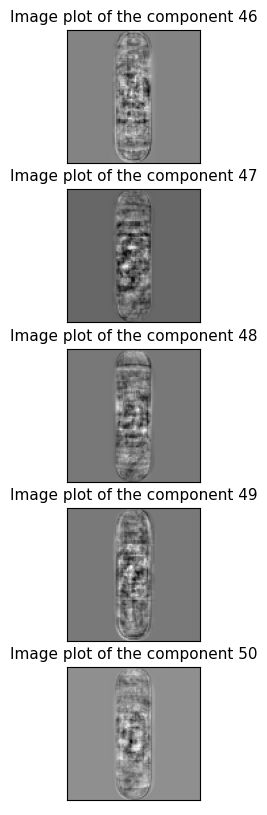

In [51]:
fig = plt.figure(figsize=(7,10))
for i in range(5):
    plt.subplot(5, 1, i+1)
    plt.title(f'Image plot of the component {i+46}', size=11)
    plt.imshow(pca.components_[-i-1].reshape(100,100), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())